<a href="https://colab.research.google.com/github/sumitchhipa/python-learning/blob/main/Project(App_Reviewa_Sentiment_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/linkedin-reviews.csv")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


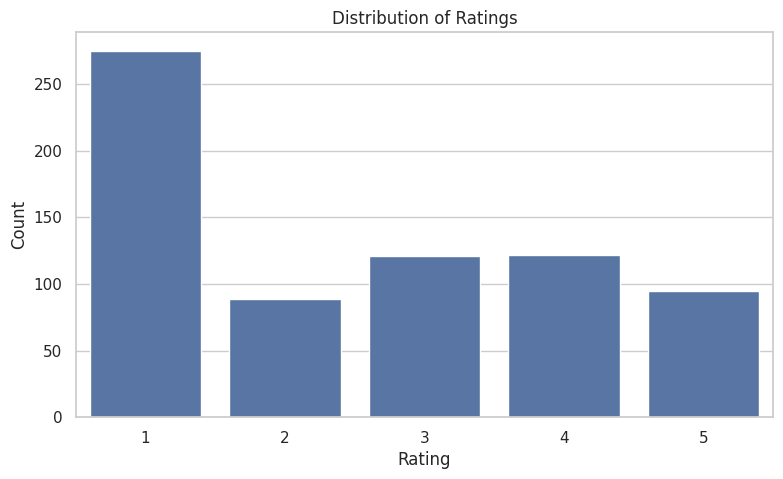

In [5]:
# EDA->Exploratory data Analysis
# ploting the distribution
sns.set(style='whitegrid')
plt.figure(figsize=(9,5))
sns.countplot(data=df,x='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()
# sns.distplot(df['Rating'])

In [6]:
# adding Sentiment Labels in the data
!pip install textblob


In [7]:
from textblob import TextBlob


In [9]:
def textblob_sentiment_analysis(review):
  sentiment=TextBlob(review).sentiment
  if sentiment.polarity>0.1:
    return 'Positive'
  elif sentiment.polarity<-0.1:
    return 'Negative'
  else:
    return 'Neutral'

In [10]:
df['Sentiment']=df['Review'].apply(textblob_sentiment_analysis)

In [11]:
df.sample(5)

,Review,Rating,Sentiment
368,"Same issues most people are having, latest upd...",1,Positive
264,No groups? Most of my traffic is on groups.......,1,Positive
258,good application works on videocon v7500... sh...,3,Positive
455,"Come on !!! We need another update, after ista...",1,Positive
422,Doesn't work since latest upgrade installed.,1,Positive


In [12]:
# analysing app reviews sentiment
sentiment_distribution=df['Sentiment'].value_counts()
sentiment_distribution

,count
Sentiment,
Positive,298
Neutral,297
Negative,107


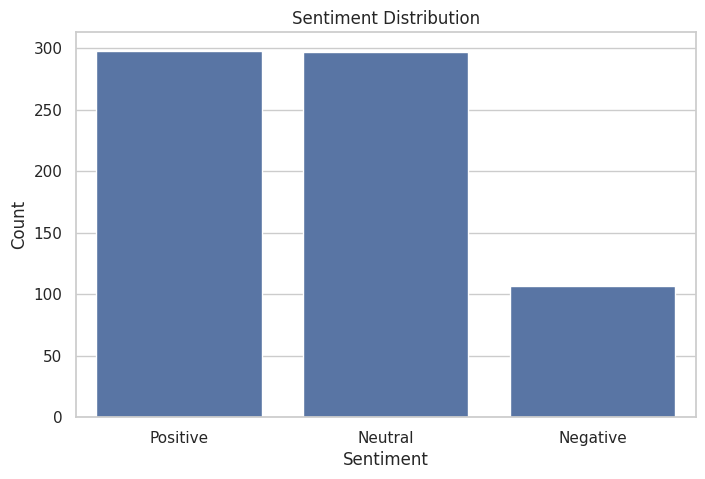

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(x=sentiment_distribution.index,
            y=sentiment_distribution.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

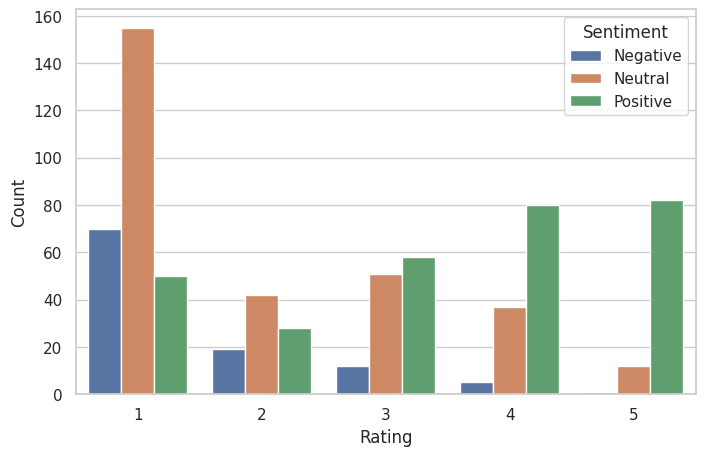

In [15]:
# so we can see althroughh the app has low ratings, still the reviewers don't use many
# negative words in the reviewsfor the app.
plt.figure(figsize=(8,5))
sns.countplot(data=df,
              x='Rating',
              hue="Sentiment")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()
